In [1]:
import pandas as pd
import numpy as np
from collections import Counter


data = pd.read_csv('../data/raw/before_data.csv', sep='|', parse_dates=['dt_reservation', 'dt_entrance'])
data = data[data.order_cnt > 0]
meta_data = pd.read_csv('../data/raw/meta_data.csv', sep="|",).set_index("ano")

In [2]:
vendors = set(data.yg_vendor_code)

In [3]:
lat_lon_dict = {}
for id_, lon, lat in zip(meta_data.index, meta_data.alng, meta_data.alat):
    lat_lon_dict[id_] = (lat, lon)

In [4]:
lats = [lat_lon_dict[vendor][0] for vendor in vendors]
lons = [lat_lon_dict[vendor][1] for vendor in vendors]

position_df = pd.DataFrame({
    'lat': lats,
    'lon': lons
})

In [445]:
np.save('test.npy', sequences)

In [448]:
a = np.load('test.npy', allow_pickle=True)

In [449]:
a == sequences

array([ True,  True,  True, ...,  True,  True,  True])

In [450]:
np.array_equal(a, sequences)

True

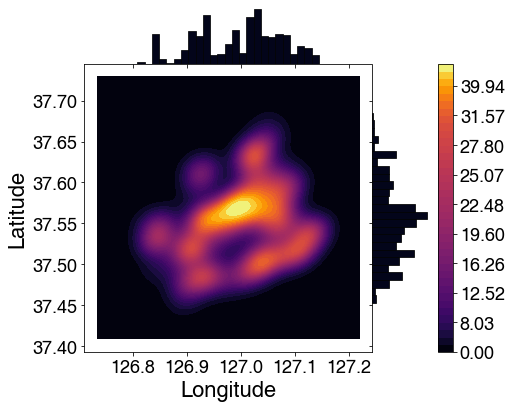

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

FONT_PATH = '../assets/Helvetica.ttf'
prop = font_manager.FontProperties(fname=FONT_PATH, size=22)
small_prop = font_manager.FontProperties(fname=FONT_PATH, size=18)


g = sns.JointGrid(data=position_df, y="lat", x="lon", space=0)
kdeplot = g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=40, cmap="inferno", cbar=True)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
# reposition the joint ax so it has the same width as the marginal x ax
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
kdeplot.fig.axes[-1].set_position([.92, pos_joint_ax.y0, .07, pos_joint_ax.height])
kdeplot.fig.axes[0].set_xlabel('Longitude',fontproperties=prop)
kdeplot.fig.axes[0].set_ylabel('Latitude',fontproperties=prop)

for label in kdeplot.fig.axes[0].get_xticklabels():
    label.set_fontproperties(small_prop)
for label in kdeplot.fig.axes[0].get_yticklabels():
    label.set_fontproperties(small_prop)
for label in kdeplot.fig.axes[-1].get_yticklabels():
    label.set_fontproperties(small_prop)

g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)


In [7]:
max(lats), min(lats)

(37.685111468, 37.45295844)

In [8]:
max(lons), min(lons)

(127.14471190879999, 126.808051138)

In [9]:
n_lat_bin_size = 30
n_lon_bin_size = 30

max_lats = 37.69
min_lats = 37.45
max_lons = 127.15
min_lons = 126.80

In [10]:
lat_bins = np.linspace(min_lats, max_lats, n_lat_bin_size + 1)
lon_bins = np.linspace(min_lons, max_lons, n_lon_bin_size + 1)

lat_digitized = np.digitize(lats, lat_bins) - 1
lon_digitized = np.digitize(lons, lon_bins) - 1

reservation_by_grid = np.zeros((n_lon_bin_size, n_lat_bin_size))
frequency_counter = data.yg_vendor_code.value_counts()

In [11]:
for i, vendor in enumerate(vendors):
    lat_bin = lat_digitized[i]
    lon_bin = lon_digitized[i]
    reservation_by_grid[lon_bin][lat_bin] += frequency_counter[vendor]


In [65]:
import geopandas as gpd
shape_file = "../data/shape_file/seoul/seoul.shp"
seoul = gpd.read_file(shape_file)

In [71]:
from pyproj import transform, Proj
from shapely.geometry import Polygon
def transform_polygon(x, mode='geo'):
    proj_UTMK = Proj(init='epsg:5178') # UTM-K(Bassel) 도로명주소 지도 사용 중
    proj_WGS84 = Proj(init='epsg:4326')
    
    utm_k_x, utm_k_y = np.array(x['geometry'].exterior.coords.xy)    
    wgs_x, wgs_y = np.array(transform(proj_UTMK,proj_WGS84, utm_k_x, utm_k_y))
    if mode == 'geo':
        return Polygon(zip(wgs_x, wgs_y))
    elif mode == 'grid':
        new_x = (wgs_x - min_lons)/(max_lons - min_lons) * n_lon_bin_size
        new_y = (wgs_y - min_lats)/(max_lats - min_lats) * n_lat_bin_size
        return Polygon(zip(new_x, new_y))
    

In [72]:
part_grid = part.copy()

In [73]:
part_grid['geometry'] = part_grid.apply(lambda x: transform_polygon(x, mode='grid'), axis=1)

/home/balla/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/balla/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/balla/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/balla/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/balla/anaconda3/lib/python3.7/

In [74]:
part_grid

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,Á¾·Î±¸,"POLYGON ((17.69843 16.65224, 17.70438 16.65010..."
1,11140,Jung-gu,Áß±¸,"POLYGON ((18.94078 15.58883, 18.95976 15.58214..."
2,11170,Yongsan-gu,¿ë»ê±¸,"POLYGON ((14.31608 13.55152, 14.31505 13.45323..."
3,11200,Seongdong-gu,¼ºµ¿±¸,"POLYGON ((20.67880 15.63589, 20.83578 15.53797..."
4,11215,Gwangjin-gu,±¤Áø±¸,"POLYGON ((25.67192 15.64388, 25.72106 15.61320..."
5,11230,Dongdaemun-gu,µ¿´ë¹®±¸,"POLYGON ((23.05023 20.00895, 23.05825 19.92954..."
6,11260,Jungnang-gu,Áß¶û±¸,"POLYGON ((26.49822 21.68023, 26.57004 21.63213..."
7,11290,Seongbuk-gu,¼ººÏ±¸,"POLYGON ((17.86539 16.62543, 17.84009 16.62698..."
8,11305,Gangbuk-gu,°­ºÏ±¸,"POLYGON ((17.34890 29.72857, 17.43143 29.70175..."
9,11320,Dobong-gu,µµºÀ±¸,"POLYGON ((18.25069 25.25468, 18.22324 25.29034..."


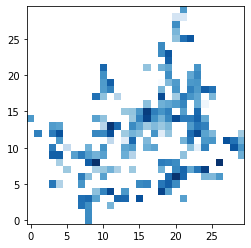

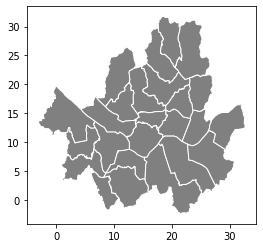

In [94]:
plt.imshow(reservation_by_grid.T, cmap=cm.Blues, norm=LogNorm(), origin ='lower')
part_grid.plot(color='grey', edgecolor='white')

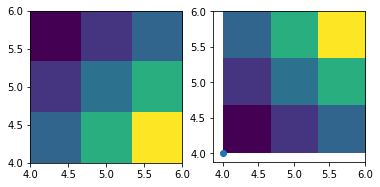

In [85]:
a = np.array([0.313660827978, 0.365348418405, 0.423733120134, 
              0.365348418405, 0.439599930621, 0.525083754405, 
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

extent = [4,6,4,6]

fig, axs = plt.subplots(1,2)

axs[0].imshow(a, extent=extent, interpolation='none')
axs[1].imshow(a, origin='lower', extent=extent, interpolation='none')
axs[1].scatter([4], [4])

In [100]:
len(lon_bins)

31

In [102]:
xs = [ for i in range(len(lon_bins) - 1]

SyntaxError: invalid syntax (<ipython-input-102-5adfe1c4d581>, line 1)

In [ ]:
zz

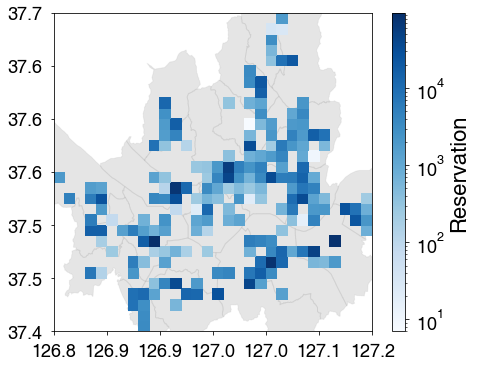

In [134]:
from pylab import figure, cm
from matplotlib.colors import LogNorm


plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

FONT_PATH = '../assets/Helvetica.ttf'
prop = font_manager.FontProperties(fname=FONT_PATH, size=22)
small_prop = font_manager.FontProperties(fname=FONT_PATH, size=18)
tiny_prop = font_manager.FontProperties(fname=FONT_PATH, size=15)

f = figure(figsize=(6.2,5.6))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.93, 0.02, 0.03, 0.79])
part_grid.plot(ax=ax, color='black', edgecolor='grey', alpha=0.1)
im = ax.pcolormesh(reservation_by_grid.T, cmap=cm.Blues, norm=LogNorm())
ax.set_xlim([0,30])
ax.set_ylim([0,30])
ax.set_xticks([0, 5,10,15,20, 25, 30])
ax.set_xticklabels([np.round(row, 1) for i, row in enumerate(lon_bins) if i % 5 == 0])
ax.set_yticklabels([np.round(row, 1) for i, row in enumerate(lat_bins) if i % 5 == 0])
cbar = f.colorbar(im, cax=axcolor)

# ax.set_xlabel('Longitude',fontproperties=prop)
# ax.set_ylabel('Latitude',fontproperties=prop)

for label in ax.get_xticklabels():
    label.set_fontproperties(small_prop)
for label in ax.get_yticklabels():
    label.set_fontproperties(small_prop)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(small_prop)

cbar.ax.set_ylabel('Reservation',fontproperties=prop)
plt.savefig('reservation_map.png', bbox_inches='tight')
    
f.show()

In [125]:
hot_spot_level = 10
non_zero_values = reservation_by_grid[reservation_by_grid != 0]
hot_spot_level_by_grid = np.zeros((n_lon_bin_size, n_lat_bin_size))
percentiles = np.linspace(0, 100, hot_spot_level + 1)

for i, per in enumerate(percentiles):
    th = np.percentile(non_zero_values, per)
    if i == 0:
        th -= 1
    hot_spot_level_by_grid[reservation_by_grid > th] = i + 1
hot_spot_level_by_grid = 11 - hot_spot_level_by_grid
masked_hot_spot_level_by_grid = np.ma.masked_where(hot_spot_level_by_grid == 11, hot_spot_level_by_grid)

In [126]:
cmap = cm.get_cmap('Blues_r', 10) 

In [127]:
from matplotlib.colors import Normalize
a = np.random.randint(5,size=(3,3))
cmap = plt.cm.jet
norm = Normalize(vmin=-2, vmax=6)
converted_a = cmap(norm(a))

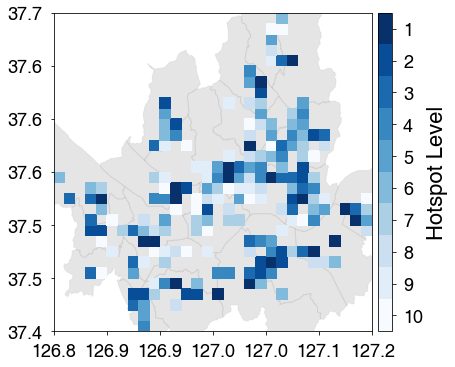

In [133]:
from pylab import cm


f = figure(figsize=(6.2,5.6))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
cmap = cm.get_cmap('Blues_r', 10) 
part_grid.plot(ax=ax, color='black', edgecolor='grey', alpha=0.1)
im = ax.pcolormesh(masked_hot_spot_level_by_grid.T, cmap=cmap,  vmin=0.5, vmax=10.5)
ax.set_xlim([0,30])
ax.set_ylim([0,30])

cbar = f.colorbar(im, cax=axcolor, ticks = np.arange(1,11))
cbar.ax.invert_yaxis()

ax.set_xticks([0,5,10,15,20, 25, 30])
ax.set_xticklabels([np.round(row, 1) for i, row in enumerate(lon_bins) if i % 5 == 0])
ax.set_yticklabels([np.round(row, 1) for i, row in enumerate(lat_bins) if i % 5 == 0])

# ax.set_xlabel('Longitude',fontproperties=prop)
# ax.set_ylabel('Latitude',fontproperties=prop)

for label in ax.get_xticklabels():
    label.set_fontproperties(small_prop)
for label in ax.get_yticklabels():
    label.set_fontproperties(small_prop)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(small_prop)
cbar.ax.set_ylabel('Hotspot Level',fontproperties=prop)
plt.savefig('hot_spot_map.png', bbox_inches='tight')

f.show()

In [129]:
import argparse
import logging
import sys
from collections import Counter, defaultdict
from itertools import permutations

import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm

data = data[data.uno2 != 0.0]  # remove Non-Members

sequences = []
for user_id, row in data.groupby("uno2"):
    if len(row) > 1:
        sorted_row = row.sort_values('dt_entrance')
        sequences.append(list(sorted_row["yg_vendor_code"]))


In [130]:
vendor_to_lan_lat_bin = {vendor: (lon_digitized[i], lat_digitized[i]) for i, vendor in enumerate(vendors)}
vendor_to_hot_spot_level ={ vendor: hot_spot_level_by_grid[lon_digitized[i]][lat_digitized[i]] for i, vendor in enumerate(vendors)}

In [136]:
hot_spot_matrix = np.zeros((hot_spot_level, hot_spot_level))
for row in sequences:
    prev_level = int(hot_spot_level_by_grid[vendor_to_lan_lat_bin[row[0]]])
    for x in row[1:]:
        cur_level = int(hot_spot_level_by_grid[vendor_to_lan_lat_bin[x]])
        hot_spot_matrix[prev_level - 1][cur_level - 1] += 1
        prev_level = cur_level
        

Counter(hot_spot_level_by_grid[hot_spot_level_by_grid != 11])

Counter({6.0: 19,
         3.0: 20,
         2.0: 19,
         10.0: 20,
         1.0: 20,
         7.0: 20,
         9.0: 20,
         5.0: 20,
         4.0: 19,
         8.0: 19})

In [137]:
normed_hot_spot_matrix = hot_spot_matrix/np.sum(hot_spot_matrix)

In [138]:
def get_tridiagonal(A):
    ks = [-1, 0, 1]
    total_sum = 0
    for k in ks:
        total_sum += np.sum(np.diag(A, k=k))
    
    return total_sum

In [139]:
get_tridiagonal(normed_hot_spot_matrix)

0.8069309555220698

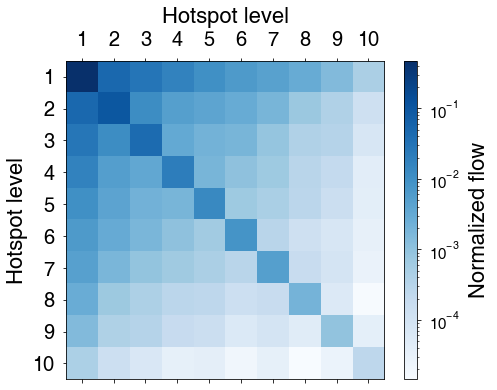

In [140]:
from pylab import figure, cm
from matplotlib.colors import LogNorm
f = figure(figsize=(6.2,5.6))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.93, 0.02, 0.03, 0.79])
small_prop = font_manager.FontProperties(fname=FONT_PATH, size=20)
tiny_prop = font_manager.FontProperties(fname=FONT_PATH, size=15)
im = ax.matshow(normed_hot_spot_matrix, cmap=cm.Blues, norm=LogNorm())
cbar = f.colorbar(im, cax=axcolor)
ax.set_xticks(np.arange(0,10))
ax.set_xticklabels(np.arange(1,11))

ax.set_yticks(np.arange(0,10))
ax.set_yticklabels(np.arange(1,11))
ax.set_ylim((9.5, -0.5))

ax.set_ylabel('Hotspot level',fontproperties=prop)
ax.set_title('Hotspot level',fontproperties=prop, y=1.1)

for label in ax.get_xticklabels():
    label.set_fontproperties(small_prop)
for label in ax.get_yticklabels():
    label.set_fontproperties(small_prop)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(tiny_prop)
cbar.ax.set_ylabel("Normalized flow", fontproperties=prop, labelpad =10)
plt.savefig('hot_spot_matrix.png', bbox_inches='tight')
plt.show()

In [141]:
null_hot_spot_matrix = np.zeros((hot_spot_level, hot_spot_level))
total_sum = np.sum(hot_spot_matrix)
for i, row in enumerate(null_hot_spot_matrix):
    for j, x in enumerate(row):
        null_hot_spot_matrix[i][j] = sum(hot_spot_matrix[i, :]) * sum(hot_spot_matrix[j, :]) / total_sum
normed_null_hot_spot_matrix = null_hot_spot_matrix/np.sum(null_hot_spot_matrix)

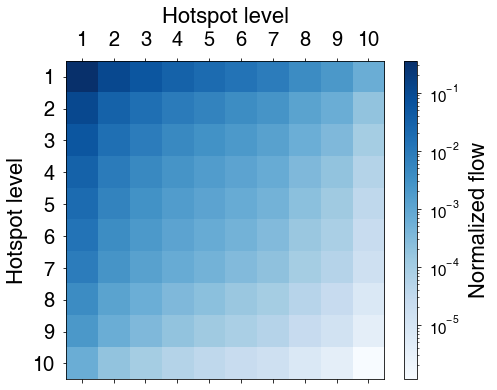

In [142]:
from pylab import figure, cm
from matplotlib.colors import LogNorm
f = figure(figsize=(6.2,5.6))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.93, 0.02, 0.03, 0.79])
small_prop = font_manager.FontProperties(fname=FONT_PATH, size=20)
tiny_prop = font_manager.FontProperties(fname=FONT_PATH, size=15)
im = ax.matshow(normed_null_hot_spot_matrix, cmap=cm.Blues, norm=LogNorm())
cbar = f.colorbar(im, cax=axcolor)
ax.set_xticks(np.arange(0,10))
ax.set_xticklabels(np.arange(1,11))

ax.set_yticks(np.arange(0,10))
ax.set_yticklabels(np.arange(1,11))
ax.set_ylim((9.5, -0.5))

ax.set_ylabel('Hotspot level',fontproperties=prop)
ax.set_title('Hotspot level',fontproperties=prop, y=1.1)

for label in ax.get_xticklabels():
    label.set_fontproperties(small_prop)
for label in ax.get_yticklabels():
    label.set_fontproperties(small_prop)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(tiny_prop)
cbar.ax.set_ylabel("Normalized flow", fontproperties=prop, labelpad =10)
plt.savefig('hot_spot_matrix_normed.png', bbox_inches='tight')
plt.show()

In [143]:
get_tridiagonal(normed_null_hot_spot_matrix)

0.6615067123437337

In [144]:
sequences = np.array(sequences)

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [145]:
hot_spot_squences = []
for row in sequences:
    hot_spot_squences.append((list(map(vendor_to_hot_spot_level.get, row))))
hot_spot_squences = np.array(hot_spot_squences)

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [146]:
from scipy.stats import entropy

entropies = []
for row in hot_spot_squences:
    temp_vec = np.zeros(10)
    temp_dict = dict(Counter(row))
    temp_sum = sum(temp_dict.values())
    for k,v in temp_dict.items():
        temp_vec[int(k - 1)] = v/temp_sum
    entropies.append(entropy(temp_vec))
entropies = np.array(entropies)

In [147]:
len(np.nonzero(entropies)[0])/len(entropies)

0.5687347241081347

In [148]:
var_list = []
for row in sequences:
    counter_dict = dict(Counter(list(map(vendor_to_lan_lat_bin.get, row))))
    max_val = max(counter_dict.values())
    max_keys = [k for k,v in counter_dict.items() if v == max_val]
    home = max_keys[np.random.choice(len(max_keys))]
    x_vars = 0
    y_vars = 0
    for k,v in counter_dict.items():
        x_vars += ((k[0] - home[0]) ** 2 ) * v
        y_vars += ((k[1] - home[1]) ** 2 ) * v
    var = np.sqrt((x_vars + y_vars)/len(row))
    var_list.append(var)
var_list = np.array(var_list)

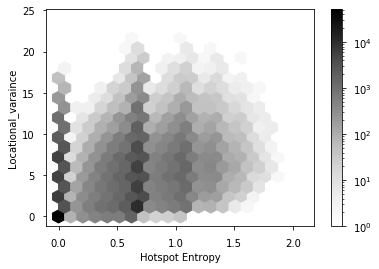

In [149]:
plt.hexbin(entropies, var_list, gridsize=(20,10), bins='log', mincnt=1, cmap='Greys')
plt.xlabel('Hotspot Entropy')
plt.ylabel('Locational_varaince')
plt.colorbar()

/home/balla/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


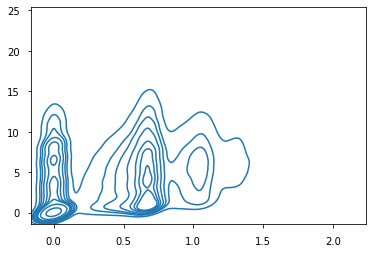

In [150]:
sns.kdeplot(entropies, var_list)

In [151]:
length_array = np.array(list(map(len, sequences)))

In [161]:
max(var_list)

23.979157616563597

In [245]:
ent_bins = np.linspace(0, 2.08, 31)
var_bins = np.linspace(0, 24, 31)

{10: 27650, 1: 43905}
{9: 14915, 1: 16045, 16: 3864}
{8: 6847, 10: 2171, 1: 8193, 15: 3607, 20: 495}
{14: 1900, 10: 1937, 1: 4910, 7: 3859, 15: 1139, 19: 670, 23: 54}
{16: 121, 10: 498, 15: 1151, 1: 3230, 13: 1153, 7: 2534, 18: 375, 19: 308, 9: 1175, 22: 123, 25: 7}
{1: 2305, 6: 1673, 19: 72, 16: 176, 10: 587, 22: 63, 12: 774, 9: 775, 17: 218, 14: 690, 18: 354, 15: 301, 21: 68, 25: 6, 28: 1}
{6: 1242, 1: 1579, 14: 369, 8: 525, 11: 495, 21: 83, 15: 312, 19: 135, 17: 235, 18: 86, 25: 11, 10: 509, 13: 476, 16: 80, 20: 38, 22: 27, 24: 2, 29: 1}
{12: 378, 10: 642, 5: 917, 1: 1232, 8: 339, 17: 271, 9: 273, 18: 96, 14: 542, 19: 89, 20: 70, 22: 44, 16: 15, 15: 101, 24: 14, 23: 9, 21: 19, 26: 2, 25: 6}


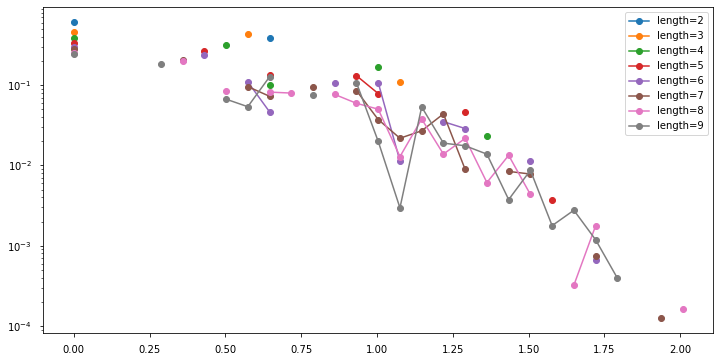

In [238]:
for x in range(2, 10):
    temp_var_list = entropies[(length_array == x)]
    temp_counter = dict(Counter(np.digitize(temp_var_list, ent_bins)))
    print(temp_counter)
    temp_sum = sum(temp_counter.values())
    temp_ys = [temp_counter.get(i, 0) /temp_sum for i in range (1, len(ent_bins))]
    temp_ys = [np.nan if x == 0 else x for x in temp_ys]
    plt.plot(ent_bins[:-1], temp_ys, '-o', label='length={}'.format(x))
    plt.yscale('log')
plt.legend()

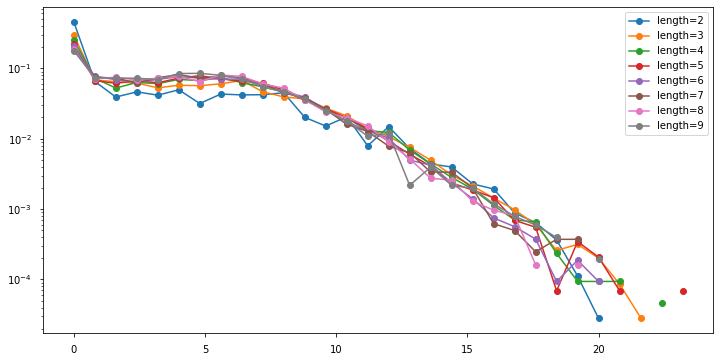

In [239]:
for x in range(2, 10):
    temp_var_list = var_list[(length_array == x)]
    temp_counter = dict(Counter(np.digitize(temp_var_list, var_bins)))
    temp_sum = sum(temp_counter.values())
    temp_ys = [temp_counter.get(i, 0) /temp_sum for i in range (1, len(var_bins))]
    temp_ys = [np.nan if x == 0 else x for x in temp_ys]
    plt.plot(var_bins[:-1], temp_ys, '-o', label='length={}'.format(x))
    plt.yscale('log')
plt.legend()

In [165]:
home_ratio = []
for row in sequences:
    counter_dict = dict(Counter(list(map(vendor_to_lan_lat_bin.get, row))))
    max_val = max(counter_dict.values())
    max_keys = [k for k,v in counter_dict.items() if v == max_val]
    home = max_keys[np.random.choice(len(max_keys))]
    home_ratio.append(counter_dict[home]/len(row))

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.03488268, 0.50680923, 1.12230779, 0.63921453, 3.27296345,
        0.55168878, 1.10741884, 0.59438816, 0.32091005, 2.61864727]),
 array([0.07142857, 0.16428571, 0.25714286, 0.35      , 0.44285714,
        0.53571429, 0.62857143, 0.72142857, 0.81428571, 0.90714286,
        1.        ]),
 <a list of 10 Patch objects>)

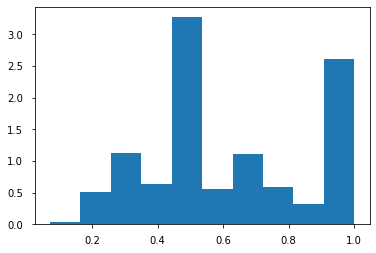

In [166]:
plt.hist(home_ratio, normed=True)

In [167]:
np.mean(home_ratio)

0.6295008684424009

In [168]:
home_ratio = np.array(home_ratio)

In [169]:
sequence_length = np.array([len(row) for row in sequences])

In [170]:
for length in set(sequence_length):
    print('{} - {} : {} - {}'.format(length, len(home_ratio[sequence_length == length]), np.mean(home_ratio[sequence_length == length]), np.median(home_ratio[sequence_length == length])))

2 - 71555 : 0.6907134372161274 - 0.5
3 - 34824 : 0.6206256221762768 - 0.6666666666666666
4 - 21313 : 0.5957748791817201 - 0.5
5 - 14469 : 0.5842007049554219 - 0.6
6 - 10675 : 0.5831225604996098 - 0.5
7 - 8063 : 0.5768324444995659 - 0.5714285714285714
8 - 6205 : 0.5739726027397261 - 0.5
9 - 5059 : 0.5732797434714809 - 0.5555555555555556
10 - 4014 : 0.5678126557050325 - 0.5
11 - 3440 : 0.5780126849894291 - 0.5454545454545454
12 - 2876 : 0.5820584144645341 - 0.5833333333333334
13 - 2430 : 0.582905982905983 - 0.5384615384615384
14 - 2042 : 0.5818525255351896 - 0.5714285714285714
15 - 1754 : 0.5881793994678829 - 0.5333333333333333
16 - 1550 : 0.5777016129032259 - 0.5625
17 - 1292 : 0.5916955017301039 - 0.5882352941176471
18 - 1173 : 0.5909822866344605 - 0.5555555555555556
19 - 1059 : 0.5848615873962526 - 0.5789473684210527
20 - 864 : 0.6096643518518519 - 0.6
21 - 778 : 0.5837923858489411 - 0.5714285714285714
22 - 674 : 0.6031157270029673 - 0.5909090909090909
23 - 618 : 0.6109469537076122 - 

In [171]:
home_list = []
for row in sequences:
    counter_dict = dict(Counter(list(map(vendor_to_lan_lat_bin.get, row))))
    max_val = max(counter_dict.values())
    max_keys = [k for k,v in counter_dict.items() if v == max_val]
    home = max_keys[np.random.choice(len(max_keys))]
    home_list.append(home)

In [172]:
home_counter = dict(Counter(home_list))
xs = [v for k,v in home_counter.items()]
ys = [reservation_by_grid[k[0]][k[1]] for k,v in home_counter.items()]

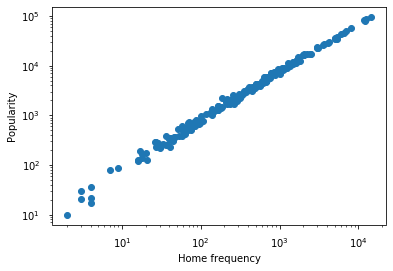

In [173]:
plt.scatter(xs,ys)
plt.xlabel('Home frequency')
plt.ylabel('Popularity')
plt.xscale('log')
plt.yscale('log')

In [174]:
homes = []
homes_p = []
for i, row in enumerate(reservation_by_grid):
    for j, val in enumerate(row):
        if val > 0:
            homes.append((i,j))
            homes_p.append(val)

In [175]:
homes = np.array(homes)
homes_p = np.array(homes_p)
homes_p = homes_p / sum(homes_p)

In [176]:
transition_prob = np.array([row/sum(row) for row in hot_spot_matrix])

In [177]:
generated_homes_idx = np.random.choice(np.arange(len(homes)), size=len(sequences), replace=True, p=homes_p)
generated_homes = [tuple(homes[idx]) for idx in generated_homes_idx]

In [178]:
generated_homes = [tuple(homes[idx]) for idx in generated_homes_idx]

In [179]:
grid_to_hot_spot_level = {(x,y): int(hot_spot_level_by_grid[x][y]) for x,y in homes}

In [180]:
from collections import defaultdict
hot_spot_level_to_grid = defaultdict(list)
for k,v in grid_to_hot_spot_level.items():
    hot_spot_level_to_grid[v].append(k)

In [181]:
generated_seuqneces = []
for home, sequence in zip(generated_homes, sequences):
    home_hot_spot_level = grid_to_hot_spot_level[home]
    temp_trans_prob = transition_prob[home_hot_spot_level - 1]
    next_hot_levels = np.random.choice(np.arange(10), size=int(len(sequence)/2), replace=True, p=temp_trans_prob)
    next_grids = [hot_spot_level_to_grid[level + 1][np.random.choice(np.arange(len(hot_spot_level_to_grid[level + 1])))] for level in next_hot_levels]
    generated_seuqnece = []
    for i in range(len(sequence)):
        if i % 2 == 0:
            generated_seuqnece.append(home)
        else:
            generated_seuqnece.append(next_grids.pop())
    generated_seuqneces.append(generated_seuqnece)

In [182]:
generated_hot_spot_squences = []
for row in generated_seuqneces:
    generated_hot_spot_squences.append((list(map(grid_to_hot_spot_level.get, row))))
generated_hot_spot_squences = np.array(generated_hot_spot_squences)

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [183]:
from scipy.stats import entropy

generated_entropies = []
for row in generated_hot_spot_squences:
    temp_vec = np.zeros(10)
    temp_dict = dict(Counter(row))
    temp_sum = sum(temp_dict.values())
    for k,v in temp_dict.items():
        temp_vec[int(k - 1)] = v/temp_sum
    generated_entropies.append(entropy(temp_vec))
generated_entropies = np.array(generated_entropies)

In [184]:
ent_bins = np.linspace(0, 2.08, 30)

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

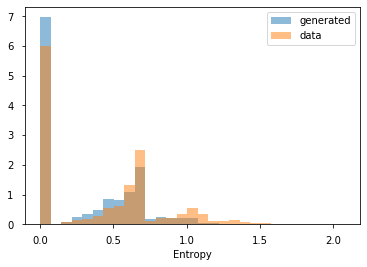

In [185]:
plt.hist(generated_entropies, bins=ent_bins, alpha=0.5, label='generated', density=True)
plt.hist(entropies, bins=ent_bins, alpha=0.5, label='data', density=True)
plt.legend()
plt.xlabel('Entropy')
plt.ylabel

In [186]:
max(generated_entropies)

1.5065950881316383

In [187]:
max(entropies)

2.0794415416798357

In [188]:
generated_var_list = []
for row in generated_seuqneces:
    counter_dict = dict(Counter(row))
    max_val = max(counter_dict.values())
    max_keys = [k for k,v in counter_dict.items() if v == max_val]
    home = max_keys[np.random.choice(len(max_keys))]
    x_vars = 0
    y_vars = 0
    for k,v in counter_dict.items():
        x_vars += ((k[0] - home[0]) ** 2 ) * v
        y_vars += ((k[1] - home[1]) ** 2 ) * v
    var = np.sqrt((x_vars + y_vars)/len(row))
    generated_var_list.append(var)

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

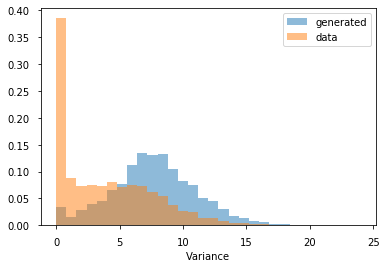

In [189]:
plt.hist(generated_var_list, bins=var_bins, alpha=0.5, label='generated', density=True)
plt.hist(var_list, bins=var_bins, alpha=0.5, label='data', density=True)
plt.legend()
plt.xlabel('Variance')
plt.ylabel

/home/balla/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


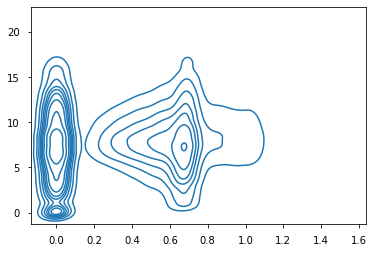

In [190]:
sns.kdeplot(generated_entropies, generated_var_list)

In [191]:
lengths = np.array(list(map(len, sequences)))

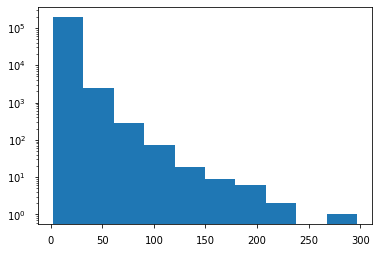

In [192]:
plt.hist(lengths[lengths < 700])
plt.yscale('log')

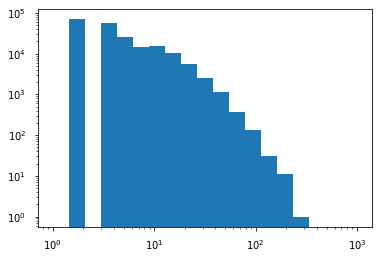

In [193]:
plt.hist(lengths[lengths < 700], bins=np.logspace(0,3,20))
plt.yscale('log')
plt.xscale('log')

In [194]:
max(lengths)

929

In [195]:
generated_sequence_by_p = {}
for p in np.linspace(0,1,11):
    p = np.round(p, 1)
    generated_seuqneces_new = []
    for home, sequence in zip(generated_homes, sequences):
        home_hot_spot_level = grid_to_hot_spot_level[home]
        temp_trans_prob = transition_prob[home_hot_spot_level - 1]
        next_hot_levels = np.random.choice(np.arange(10), size=int(len(sequence)/2), replace=True, p=temp_trans_prob) + 1
        next_girds = []
        for level in next_hot_levels:
            if home_hot_spot_level == level:
                if np.random.random() < p:
                    next_grid = home
                else:
                    target_grids = [spot for spot in hot_spot_level_to_grid[level] if spot != home]
                    weight = np.array([1/np.sqrt((spot[0] - home[0]) ** 2 + (spot[1] - home[1]) ** 2) for spot in target_grids])
                    weight = weight/sum(weight)
                    next_grid = target_grids[np.random.choice(np.arange(len(target_grids)), p=weight)]

            else:
                target_grids = hot_spot_level_to_grid[level]
                weight = np.array([1/np.sqrt((spot[0] - home[0]) ** 2 + (spot[1] - home[1]) ** 2) for spot in target_grids])
                weight = weight/sum(weight)
                next_grid = target_grids[np.random.choice(np.arange(len(target_grids)), p=weight)]
            next_grids.append(next_grid)
        generated_seuqnece = []
        for i in range(len(sequence)):
            if i % 2 == 0:
                generated_seuqnece.append(home)
            else:
                generated_seuqnece.append(next_grids.pop())
        generated_seuqneces_new.append(generated_seuqnece)
    generated_sequence_by_p[p] = generated_seuqneces_new

In [ ]:
def generate_sequence

In [ ]:
generated_homes_idx = np.random.choice(np.arange(len(homes)), size=len(sequences), replace=True, p=homes_p)
generated_homes = [tuple(homes[idx]) for idx in generated_homes_idx]

In [294]:
len(homes)

196

In [196]:
from scipy.stats import entropy
def calculate_entorpy(given_sequences):
    entropy_array = []
    for row in given_sequences:
        hot_spot_row = list(map(grid_to_hot_spot_level.get, row))
        temp_vec = np.zeros(10)
        temp_dict = dict(Counter(hot_spot_row))
        temp_sum = sum(temp_dict.values())
        for k,v in temp_dict.items():
            temp_vec[int(k - 1)] = v/temp_sum
        entropy_array.append(entropy(temp_vec))
    entropy_array = np.array(entropy_array)
    
    return entropy_array

In [197]:
def calculate_var_list(given_sequences):
    var_array = []
    for row in given_sequences:
        counter_dict = dict(Counter(row))
        max_val = max(counter_dict.values())
        max_keys = [k for k,v in counter_dict.items() if v == max_val]
        home = max_keys[np.random.choice(len(max_keys))]
        x_vars = 0
        y_vars = 0
        for k,v in counter_dict.items():
            x_vars += ((k[0] - home[0]) ** 2 ) * v
            y_vars += ((k[1] - home[1]) ** 2 ) * v
        var = np.sqrt((x_vars + y_vars)/len(row))
        var_array.append(var)
    var_array = np.array(var_array)
    
    return var_array

In [198]:
entropies_by_p = {}
var_by_p = {}
for k,v in generated_sequence_by_p.items():
    entropies_by_p[k] = calculate_entorpy(v)
    var_by_p[k] = calculate_var_list(v)

In [199]:
entropies_by_p[0.0] == entropies_by_p[1.0]

array([ True,  True, False, ...,  True,  True,  True])

In [200]:
entropies_by_p[0.0]

array([0.        , 0.        , 0.19851524, ..., 0.69314718, 0.        ,
       0.69314718])

In [219]:
temp_counter = dict(Counter(np.digitize(temp_var_list, var_bins)))

In [226]:
temp_counter = dict(Counter(np.digitize(temp_var_list, var_bins)))
temp_sum = sum(temp_counter.values())
temp_ys = [temp_counter.get(i, 0) /temp_sum for i in range (1, len(var_bins))]

In [254]:
ent_xs = [(ent_bins[i] + ent_bins[i + 1])/2 for i in range(len(ent_bins) - 1)]
var_xs = [(var_bins[i] + var_bins[i + 1])/2 for i in range(len(var_bins) - 1)]

In [255]:
def get_pdf(points, bins):
    temp_counter = Counter(np.digitize(points, bins))
    temp_sum = sum(temp_counter.values())
    temp_ys = [temp_counter.get(i, 0) /temp_sum for i in range (1, len(bins))]
    
    return temp_ys

In [257]:
ent_data_pdf = get_pdf(entropies, ent_bins)
var_data_pdf = get_pdf(var_list, var_bins)

In [306]:
homes_p_dict = {}
for i, row in enumerate(reservation_by_grid):
    for j, val in enumerate(row):
        if val > 0:
            homes_p_dict[(i,j)] = val
homes = list(homes_p_dict.keys())
home_p = np.array([homes_p_dict[home] for home in homes])
homes_p = homes_p / sum(homes_p)

In [319]:
def generate_homes(homes_p_dict, total_length):
    homes = list(homes_p_dict.keys())
    homes_p = np.array([homes_p_dict[home] for home in homes])
    homes_p = homes_p / sum(homes_p)
    
    generated_homes_idx = np.random.choice(np.arange(len(homes)), size=total_length, replace=True, p=homes_p)
    generated_homes = [tuple(homes[idx]) for idx in generated_homes_idx]
    
    return generated_homes

In [334]:
generated_homes = generate_homes(homes_p_dict, len(sequences))

In [335]:
sequence_length = list(map(len, sequences))

In [437]:
def generate_sequence(p, k, generated_homes, sequence_length, grid_to_hot_spot_level, hot_spot_level_to_grid, transition_matrix):
    generated_sequences = []
    for home, length in zip(generated_homes, sequence_length):
        home_hot_spot_level = grid_to_hot_spot_level[home]
        temp_trans_prob = transition_matrix[home_hot_spot_level - 1]
        next_hot_levels = np.random.choice(np.arange(10), size=int(length/2), replace=True, p=temp_trans_prob) + 1
        next_grids = []
        
        for level in next_hot_levels:
            if home_hot_spot_level == level:
                if np.random.random() < p:
                    next_grid = home
                else:
                    next_grid = get_next_grid(home, k, hot_spot_level_to_grid[level])
            else:
                next_grid = get_next_grid(home, k, hot_spot_level_to_grid[level])
            next_grids.append(next_grid)
        
        temp_sequnece = []
        for i in range(length):
            if i % 2 == 0:
                temp_sequnece.append(home)
            else:
                temp_sequnece.append(next_grids.pop())
        generated_sequences.append(temp_sequnece)
        
    return generated_sequences
        
def get_next_grid(home, k, target_grids):
    target_grids = [spot for spot in target_grids if spot != home]
    weight = np.array([1/np.power(np.sqrt((spot[0] - home[0]) ** 2 + (spot[1] - home[1]) ** 2), k) for spot in target_grids])
    weight = weight/sum(weight)
    
    return target_grids[np.random.choice(np.arange(len(target_grids)), p=weight)]

In [438]:
aa = generate_sequence(0.6, 1, generated_homes, sequence_length, grid_to_hot_spot_level, hot_spot_level_to_grid, transition_prob)

In [439]:
wow = calculate_entorpy(aa)

In [440]:
wow_1 = calculate_var_list(aa)

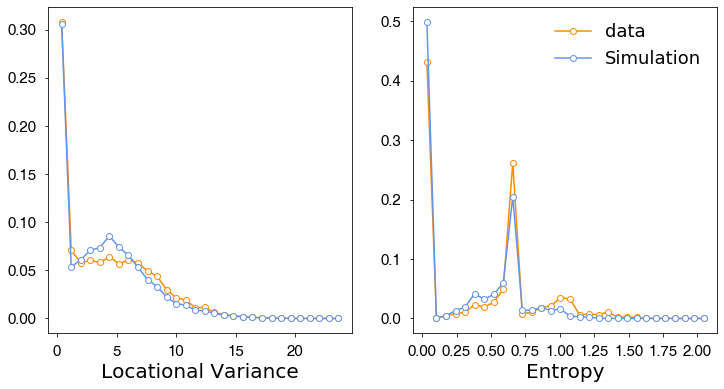

0.06704208271656999 0.1578511266342183


In [441]:

    temp_vars_pdf = get_pdf(wow_1, var_bins)
    temp_ent_pdf = get_pdf(wow, ent_bins)
     
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.plot(var_xs, var_data_pdf, '-o', markerfacecolor='white', color='darkorange', label='data')
    ax1.plot(var_xs, temp_vars_pdf, '-o', markerfacecolor='white', color='cornflowerblue', label='Simulation')
    ax1.set_xlabel('Locational Variance',fontsize=20)

    ax2.plot(ent_xs, ent_data_pdf, '-o', markerfacecolor='white', color='darkorange', label='data')
    ax2.plot(ent_xs, temp_ent_pdf, '-o', markerfacecolor='white', color='cornflowerblue', label='Simulation')
    ax2.set_xlabel('Entropy', fontsize=20)
    
    plt.legend(fontsize=18, frameon=False)

    for label in ax1.get_xticklabels():
        label.set_fontproperties(tiny_prop)
    for label in ax1.get_yticklabels():
        label.set_fontproperties(tiny_prop)
    for label in ax2.get_xticklabels():
        label.set_fontproperties(tiny_prop)
    for label in ax2.get_yticklabels():
        label.set_fontproperties(tiny_prop)
    plt.savefig('{}.png'.format(p))
    plt.show()
    
    var_jsd = jensenshannon(var_data_pdf, temp_vars_pdf)
    ent_jsd = jensenshannon(ent_data_pdf, temp_ent_pdf)
    print(var_jsd, ent_jsd)

In [435]:
xcx = list(map(len, aa))

In [409]:
cxc = list(map(len, generated_sequence_by_p[0]))

In [410]:
xcx[0]

3

In [411]:
generated_sequence_by_p = {}
for p in np.linspace(0,1,11):
    p = np.round(p, 1)
    generated_seuqneces_new = []
    for home, sequence in zip(generated_homes, sequences):
        home_hot_spot_level = grid_to_hot_spot_level[home]
        temp_trans_prob = transition_prob[home_hot_spot_level - 1]
        next_hot_levels = np.random.choice(np.arange(10), size=int(len(sequence)/2), replace=True, p=temp_trans_prob) + 1
        next_girds = []
        for level in next_hot_levels:
            if home_hot_spot_level == level:
                if np.random.random() < p:
                    next_grid = home
                else:
                    target_grids = [spot for spot in hot_spot_level_to_grid[level] if spot != home]
                    weight = np.array([1/np.sqrt((spot[0] - home[0]) ** 2 + (spot[1] - home[1]) ** 2) for spot in target_grids])
                    weight = weight/sum(weight)
                    next_grid = target_grids[np.random.choice(np.arange(len(target_grids)), p=weight)]

            else:
                target_grids = hot_spot_level_to_grid[level]
                weight = np.array([1/np.sqrt((spot[0] - home[0]) ** 2 + (spot[1] - home[1]) ** 2) for spot in target_grids])
                weight = weight/sum(weight)
                next_grid = target_grids[np.random.choice(np.arange(len(target_grids)), p=weight)]
            next_grids.append(next_grid)
        generated_seuqnece = []
        for i in range(len(sequence)):
            if i % 2 == 0:
                generated_seuqnece.append(home)
            else:
                generated_seuqnece.append(next_grids.pop())
        generated_seuqneces_new.append(generated_seuqnece)
    generated_sequence_by_p[p] = generated_seuqneces_new
    break


In [412]:
entropies_by_p = {}
var_by_p = {}
for k,v in generated_sequence_by_p.items():
    entropies_by_p[k] = calculate_entorpy(v)
    var_by_p[k] = calculate_var_list(v)

0.0


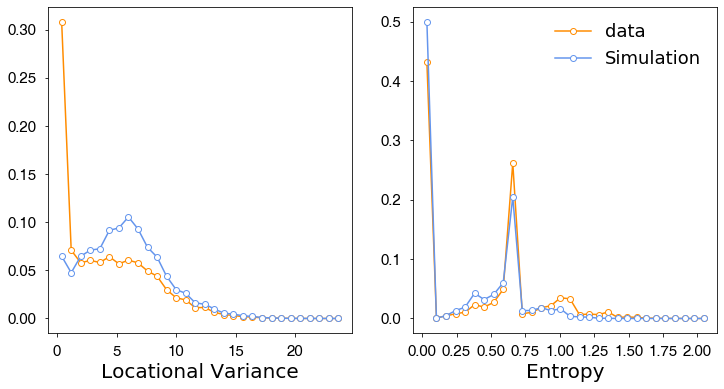

0.2407037341459233 0.15867866905201813


In [413]:
from scipy.spatial.distance import jensenshannon

plt.rcParams['figure.figsize'] = (12.0, 6.0)
for p in generated_sequence_by_p.keys():
    print(p)
    temp_vars = var_by_p[p]
    temp_entropy = entropies_by_p[p]
    temp_vars_pdf = get_pdf(temp_vars, var_bins)
    temp_ent_pdf = get_pdf(temp_entropy, ent_bins)
     
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.plot(var_xs, var_data_pdf, '-o', markerfacecolor='white', color='darkorange', label='data')
    ax1.plot(var_xs, temp_vars_pdf, '-o', markerfacecolor='white', color='cornflowerblue', label='Simulation')
    ax1.set_xlabel('Locational Variance',fontsize=20)

    ax2.plot(ent_xs, ent_data_pdf, '-o', markerfacecolor='white', color='darkorange', label='data')
    ax2.plot(ent_xs, temp_ent_pdf, '-o', markerfacecolor='white', color='cornflowerblue', label='Simulation')
    ax2.set_xlabel('Entropy', fontsize=20)
    
    plt.legend(fontsize=18, frameon=False)

    for label in ax1.get_xticklabels():
        label.set_fontproperties(tiny_prop)
    for label in ax1.get_yticklabels():
        label.set_fontproperties(tiny_prop)
    for label in ax2.get_xticklabels():
        label.set_fontproperties(tiny_prop)
    for label in ax2.get_yticklabels():
        label.set_fontproperties(tiny_prop)
    plt.savefig('{}.png'.format(p))
    plt.show()
    
    var_jsd = jensenshannon(var_data_pdf, temp_vars_pdf)
    ent_jsd = jensenshannon(ent_data_pdf, temp_ent_pdf)
    
    print(var_jsd, ent_jsd)
    break

0.0


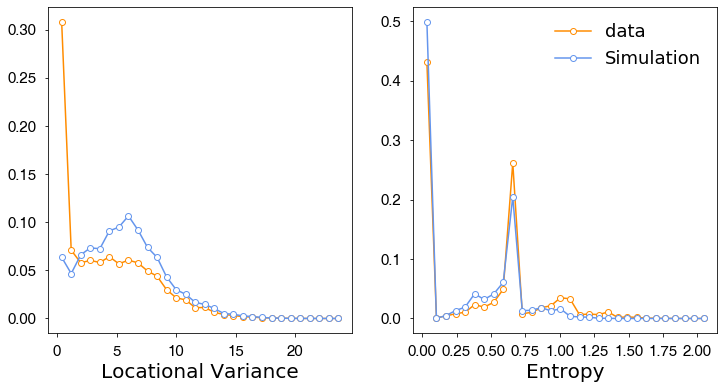

0.2422621221065914 0.15925555480680934
0.1


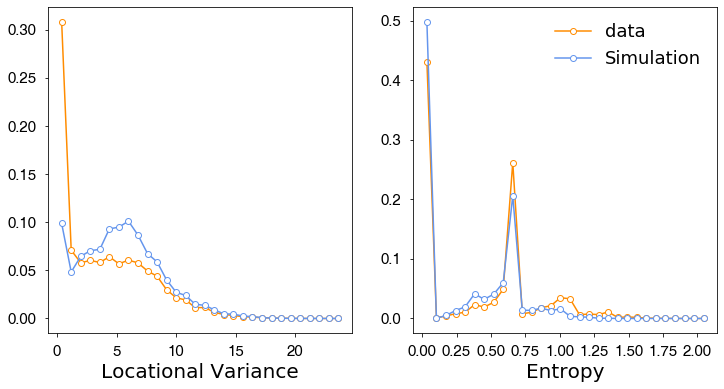

0.20029012032409 0.1583683864249777
0.2


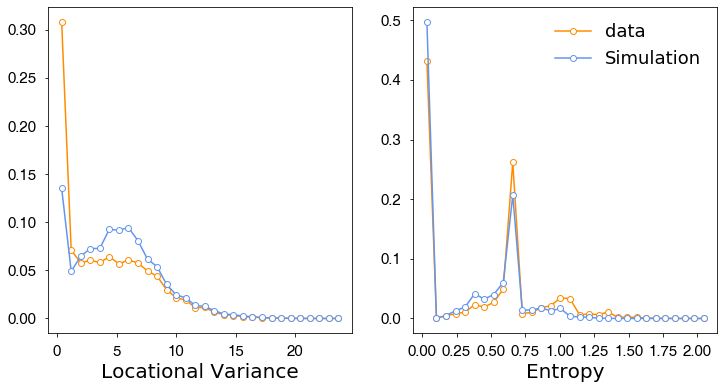

0.1622458227468311 0.15815553575417368
0.3


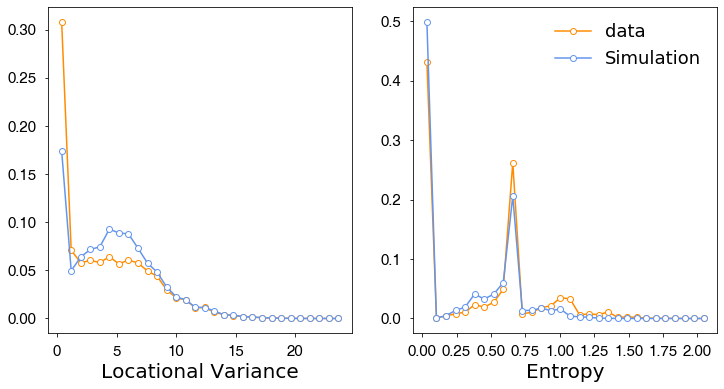

0.12783438839458952 0.1578509638356939
0.4


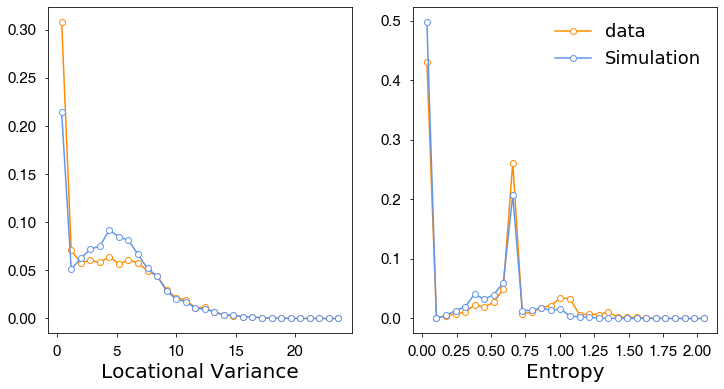

0.09794632354043173 0.15697368475148923
0.5


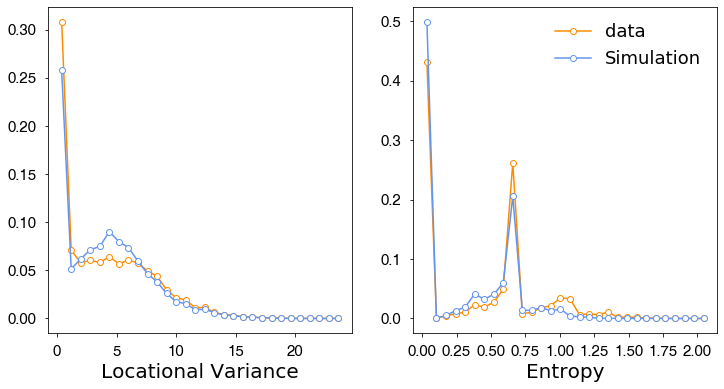

0.07511783789977283 0.15778961945191242
0.6


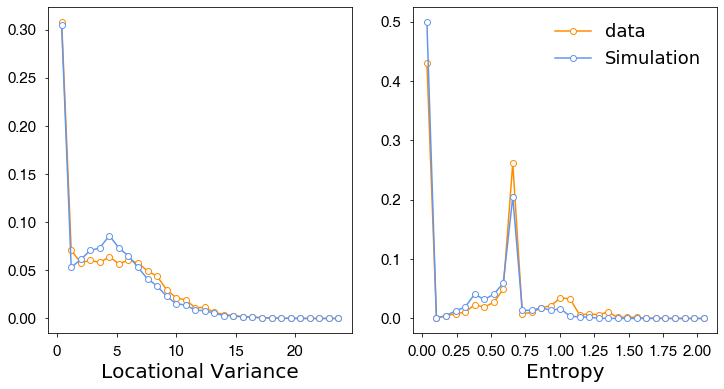

0.06543314722881499 0.15764475930624447
0.7


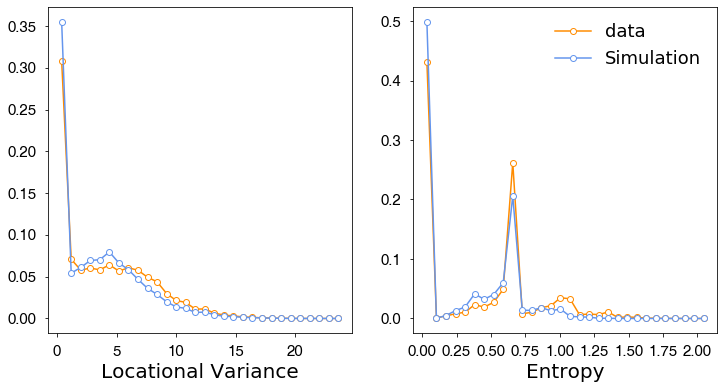

0.07807726882217782 0.15866224520528072
0.8


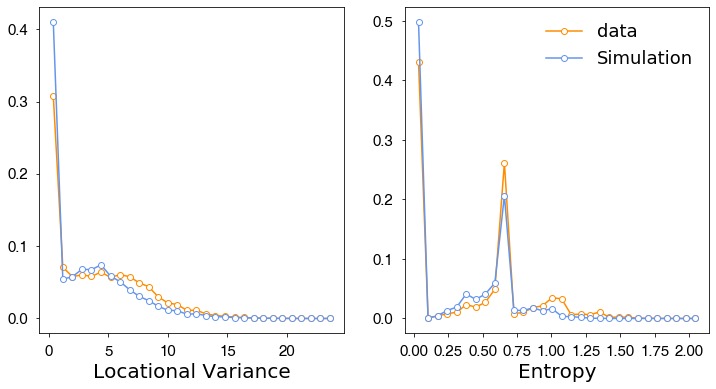

0.10803807710888057 0.15767208673821095
0.9


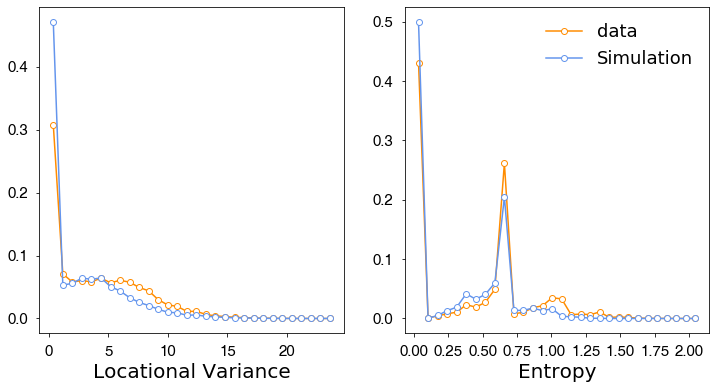

0.14472021563330095 0.15869730273496852
1.0


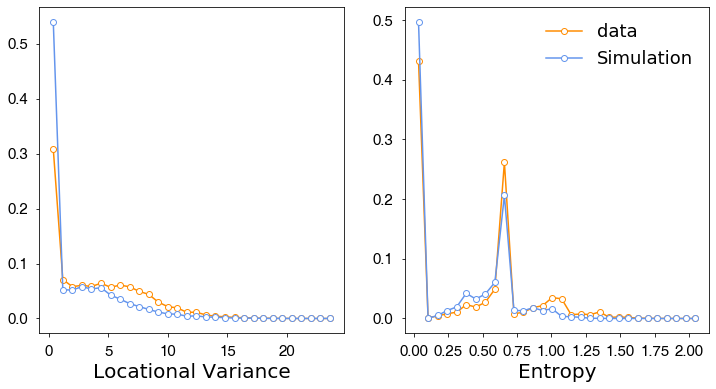

0.18804819366609246 0.1592999540683971


In [293]:
from scipy.spatial.distance import jensenshannon

plt.rcParams['figure.figsize'] = (12.0, 6.0)
for p in generated_sequence_by_p.keys():
    print(p)
    temp_vars = var_by_p[p]
    temp_entropy = entropies_by_p[p]
    temp_vars_pdf = get_pdf(temp_vars, var_bins)
    temp_ent_pdf = get_pdf(temp_entropy, ent_bins)
     
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.plot(var_xs, var_data_pdf, '-o', markerfacecolor='white', color='darkorange', label='data')
    ax1.plot(var_xs, temp_vars_pdf, '-o', markerfacecolor='white', color='cornflowerblue', label='Simulation')
    ax1.set_xlabel('Locational Variance',fontsize=20)

    ax2.plot(ent_xs, ent_data_pdf, '-o', markerfacecolor='white', color='darkorange', label='data')
    ax2.plot(ent_xs, temp_ent_pdf, '-o', markerfacecolor='white', color='cornflowerblue', label='Simulation')
    ax2.set_xlabel('Entropy', fontsize=20)
    
    plt.legend(fontsize=18, frameon=False)

    for label in ax1.get_xticklabels():
        label.set_fontproperties(tiny_prop)
    for label in ax1.get_yticklabels():
        label.set_fontproperties(tiny_prop)
    for label in ax2.get_xticklabels():
        label.set_fontproperties(tiny_prop)
    for label in ax2.get_yticklabels():
        label.set_fontproperties(tiny_prop)
    plt.savefig('{}.png'.format(p))
    plt.show()
    
    var_jsd = jensenshannon(var_data_pdf, temp_vars_pdf)
    ent_jsd = jensenshannon(ent_data_pdf, temp_ent_pdf)
    
    print(var_jsd, ent_jsd)
    break

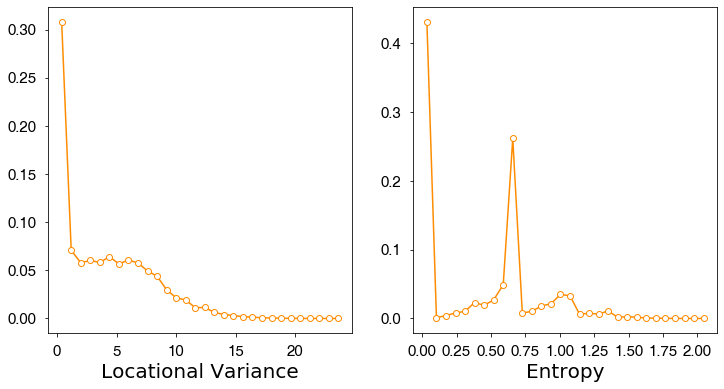

In [278]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(var_xs, var_data_pdf, '-o', markerfacecolor='white', color='darkorange')
ax1.set_xlabel('Locational Variance',fontsize=20)

ax2.plot(ent_xs, ent_data_pdf, '-o', markerfacecolor='white', color='darkorange')
ax2.set_xlabel('Entropy', fontsize=20)

for label in ax1.get_xticklabels():
    label.set_fontproperties(tiny_prop)
for label in ax1.get_yticklabels():
    label.set_fontproperties(tiny_prop)
for label in ax2.get_xticklabels():
    label.set_fontproperties(tiny_prop)
for label in ax2.get_yticklabels():
    label.set_fontproperties(tiny_prop)

plt.show()